In [1]:
import api
import pandas as pd
import matplotlib.pyplot as mpl
df2 = api.get_merged_dataframe('14L', '5.1')
#14L to select Manchester CCG and 5.1 to select Antibacterial group
df2.head()

,actual_cost,ccg,date,items,quantity,row_id,row_name,setting,total_list_size,items_per_patient
0,2856.64,14L,2014-10-01,417,18650,P84004,FIVE OAKS FAMILIY PRACTICE,4,8819,0.047284
1,919.79,14L,2014-10-01,203,8165,P84005,THE VALLANCE CENTRE,4,7223,0.028105
2,2063.74,14L,2014-10-01,357,17084,P84009,AILSA CRAIG MEDICAL CENTRE,4,9342,0.038215
3,1873.21,14L,2014-10-01,423,17154,P84010,THE BORCHARDT MEDICAL CENTRE,4,11108,0.038081
4,2992.22,14L,2014-10-01,644,28069,P84012,NORTHENDEN GROUP PRACTICE,4,11028,0.058397


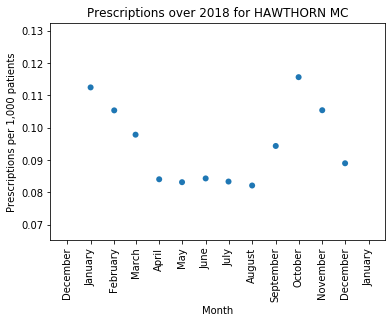

In [15]:
import matplotlib.dates as mdates

practice = "HAWTHORN MC"
#used get_practice_info from api.py to search for practices and retrieve practice code 
practice_code = api.get_practice_info(practice)["code"]
year = 2018
#convert pandas data to numpydatetime frame to allow months on axes 
df2["date"] = pd.to_datetime(df2["date"])
#add extra column containing year to allow filtering by year 
df2["year"] = [d.year for d in df2['date']]
#filter table based on year variable
df = df2[df2.year == year]
#filter table based on practice code
df = df[df.row_id == practice_code]

#make new figure 
fig = mpl.scatter(df["date"], df["items_per_patient"], edgecolors='none', )
#rotate labels on xaxis so months are legible
mpl.xticks(rotation=90)
ax = fig.axes
#set x and y axes labels and title of graph
ax.set_xlabel('Month')
ax.set_ylabel('Prescriptions per 1,000 patients')
ax.set_title(f'Prescriptions over {year} for {practice}')
#converted years to months
ax.xaxis.set_major_formatter(mdates.DateFormatter('%B'))
#Displays every month on axis 
ax.xaxis.set_major_locator(mdates.MonthLocator())